## Import our library

In [42]:
# import the library
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from ml_metrics import rmse
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
# loading datasets
salaryData = pd.read_csv("data/Salary_Data.csv")
salaryData.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Data cleaning and information

In [44]:
# shape of the data
print('Dimenssion:', salaryData.shape)

Dimenssion: (30, 2)


In [45]:
# datatypes and information of the data
salaryData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [46]:
# statistical summary of the data
salaryData.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [47]:
salaryData.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [48]:
salaryData[salaryData.duplicated()].shape

(0, 2)

## Data exploration

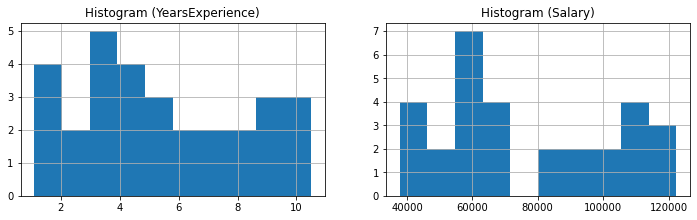

In [49]:
# histogram for visualize the data distribution
plt.figure(figsize=(12,7))
plt.subplot(2, 2, 1)
salaryData['YearsExperience'].hist()
plt.title('Histogram (YearsExperience)')
plt.subplot(2, 2, 2)
salaryData['Salary'].hist()
plt.title('Histogram (Salary)')
plt.show()

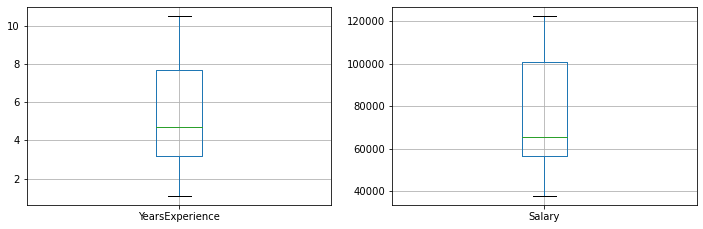

In [50]:
# check the outliers
plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
salaryData.boxplot(column=['YearsExperience'])

plt.subplot(2, 2, 2)
salaryData.boxplot(column=['Salary'])

plt.show()

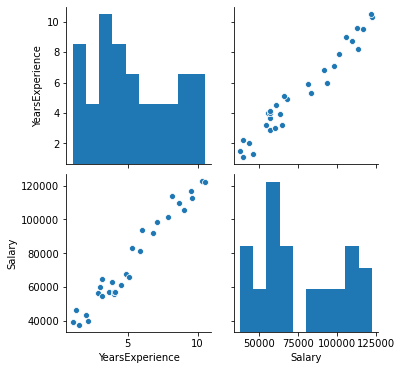

In [51]:
# check the pair-wise relationships
sns.pairplot(salaryData)

Text(0.5, 1.0, 'Coorelation heatmap')

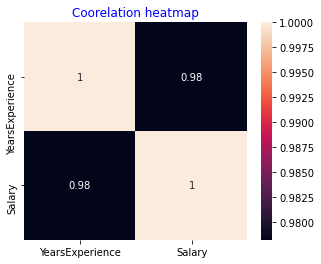

In [52]:
# coorelation matrix
plt.figure(figsize = (5,4))
sns.heatmap(salaryData.corr(), annot = True)
plt.title('Coorelation heatmap', color='blue')

In [53]:
# measure of coorelation
salaryData.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


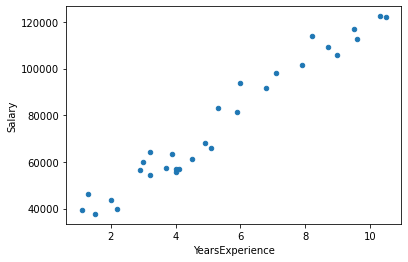

In [54]:
# scatter plot to bvisualize the relationship between the data
salaryData.plot.scatter(x = 'YearsExperience', y = 'Salary')

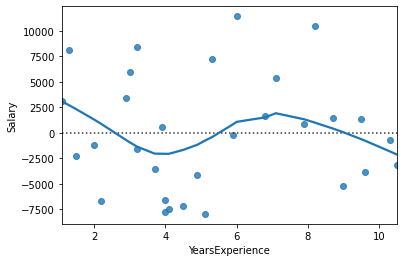

In [55]:
# to check the residuals (fitted value against residuals) : heteroscedasticity
sns.residplot(x = 'YearsExperience', y = 'Salary', data = salaryData, lowess = True)

* Residual plot shows fairly random pattern
* No U-shaped pattern or O-shaped pattern is found 
* This random pattern indicates that a linear model provides a decent fit to the data.

## Build a model

In [56]:
# model1 and summary (Transformation: normal)
model1 = smf.ols("Salary ~ YearsExperience", data = salaryData).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           1.14e-20
Time:                        22:28:34   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# model1 predicted and RMSE value
predict1 = model1.predict(salaryData.YearsExperience)
rmseValue1 = rmse(predict1, salaryData.Salary) 
print(rmseValue1)

5592.043608760662


In [58]:
model1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

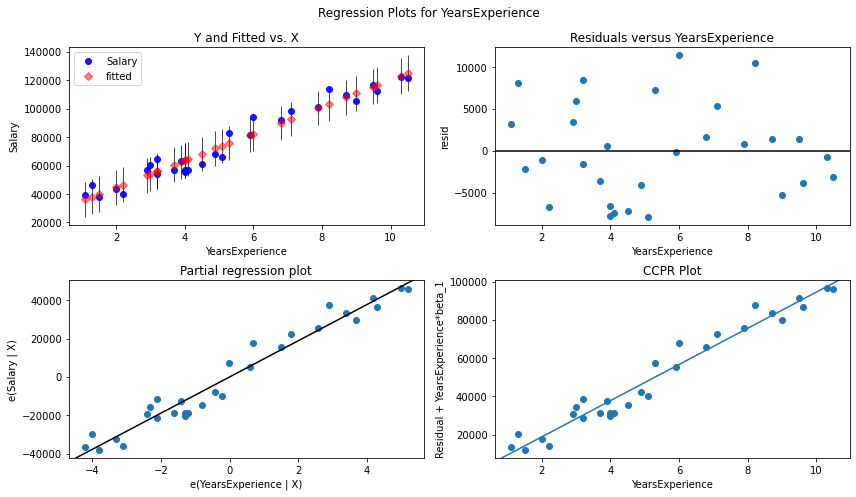

In [59]:
# regression plots for model1
import statsmodels.api as sm

fig = plt.figure(figsize =(12,7))
fig = sm.graphics.plot_regress_exog(model1, 'YearsExperience', fig = fig)

In [60]:
# model2 and summary (Transformation: logarithamic)
model2=smf.ols("Salary ~ np.log(YearsExperience) + 1", data = salaryData).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           3.25e-13
Time:                        22:28:37   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# model2 predicted and RMSE value
predict2 = model2.predict(salaryData.YearsExperience)
rmseValue2 = rmse(predict2, salaryData.Salary) 
print(rmseValue2)

10302.893706228308


In [62]:
model2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

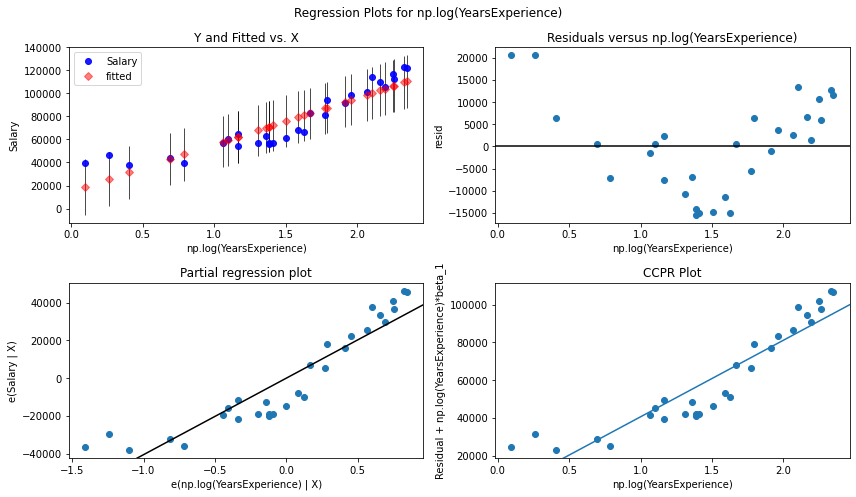

In [63]:
# regression plot for model2
fig = plt.figure(figsize =(12,7))
fig = sm.graphics.plot_regress_exog(model2, 'np.log(YearsExperience)', fig = fig)

In [64]:
# model3 and summary (Transformation: reciprocal)
def rT(x):
    return 1/x

model3 =smf.ols("Salary ~ rT(YearsExperience)", data = salaryData).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     40.06
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           7.58e-07
Time:                        22:28:39   Log-Likelihood:                -335.30
No. Observations:                  30   AIC:                             674.6
Df Residuals:                      28   BIC:                             677.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.043e+05   5533.996     18.842      0.000    9.29e+04    1.16e+05
rT(YearsExperience) -1.036e+05   1.64e+04     -6.329      0.000   -1.37e+05   -7.01e+04
==============================================================================
Omnibus:                       10.284   Durbin-Watson:                   0.220
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                2.740
Skew:                           0.290   Prob(JB):                        0.254
Kurtosis:                       1.638   Cond. No.                         5.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# model3 predicted and RMSE value
predict3 = model3.predict(salaryData.YearsExperience)
rmseValue3 = rmse(predict3, salaryData.Salary) 
print(rmseValue3)

17288.30098984632


In [66]:
model3.params

Intercept              104273.335111
rT(YearsExperience)   -103620.843905
dtype: float64

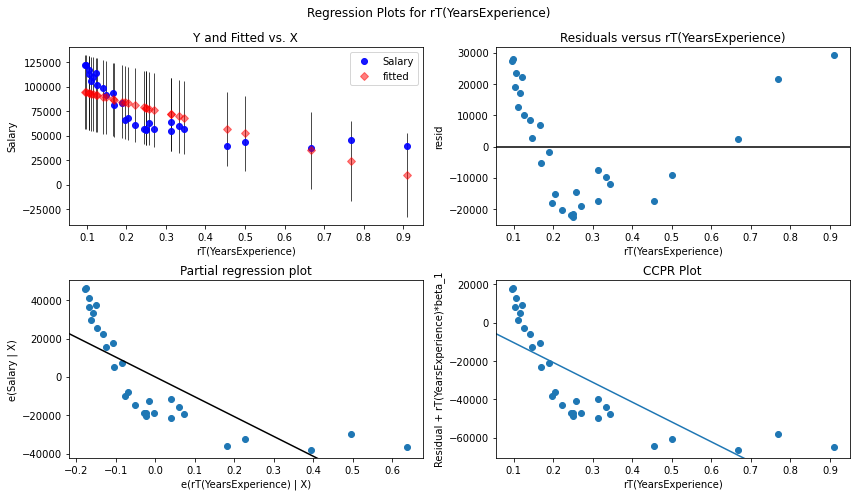

In [67]:
# regression plot for model3
fig = plt.figure(figsize =(12,7))
fig = sm.graphics.plot_regress_exog(model3, 'rT(YearsExperience)', fig = fig)

In [68]:
# model4 and summary (Transformation: Square root)
def sRT(x):
    return x**(1/2)

model4 =smf.ols("Salary ~ sRT(YearsExperience)", data = salaryData).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           8.57e-18
Time:                        22:28:42   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
sRT(YearsExperience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# model4 predicted and RMSE value
predict4 = model4.predict(salaryData.YearsExperience)
rmseValue4 = rmse(predict4, salaryData.Salary) 
print(rmseValue4)

7080.09573498304


In [70]:
model4.params

Intercept              -16055.769117
sRT(YearsExperience)    41500.680583
dtype: float64

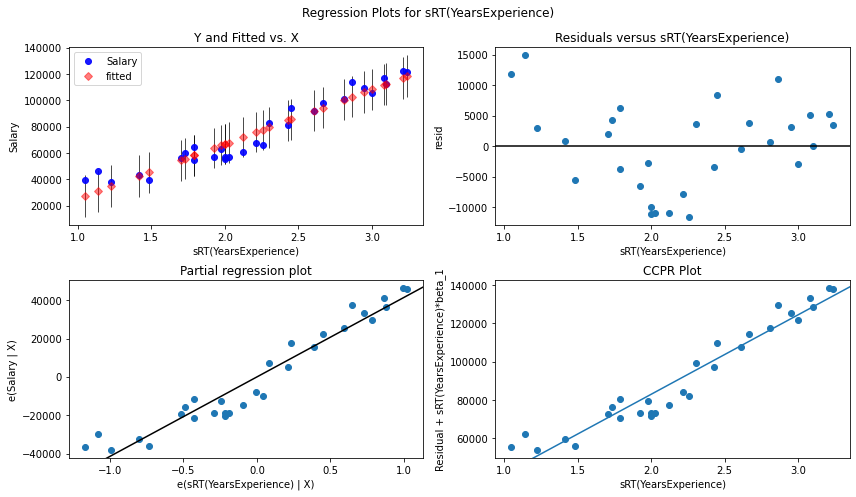

In [71]:
# regression plot for model4
fig = plt.figure(figsize =(12,7))
fig = sm.graphics.plot_regress_exog(model4, 'sRT(YearsExperience)', fig = fig)

In [72]:
# model5 and summary (Transformation: exponential)
def eT(x):
    return x**(1/5)

model5=smf.ols("Salary ~ eT(YearsExperience)", data = salaryData).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     229.3
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           5.14e-15
Time:                        22:28:44   Log-Likelihood:                -315.35
No. Observations:                  30   AIC:                             634.7
Df Residuals:                      28   BIC:                             637.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.385e+05   1.43e+04     -9.711      0.000   -1.68e+05   -1.09e+05
eT(YearsExperience)  1.576e+05   1.04e+04     15.144      0.000    1.36e+05    1.79e+05
==============================================================================
Omnibus:                        0.572   Durbin-Watson:                   0.670
Prob(Omnibus):                  0.751   Jarque-Bera (JB):                0.643
Skew:                           0.092   Prob(JB):                        0.725
Kurtosis:                       2.307   Cond. No.                         17.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# model5 predicted and RMSE value
predict5 = model5.predict(salaryData.YearsExperience)
rmseValue5 = rmse(predict5, salaryData.Salary) 
print(rmseValue5)

8890.77038738864


In [74]:
model5.params

Intercept             -138521.365038
eT(YearsExperience)    157602.070301
dtype: float64

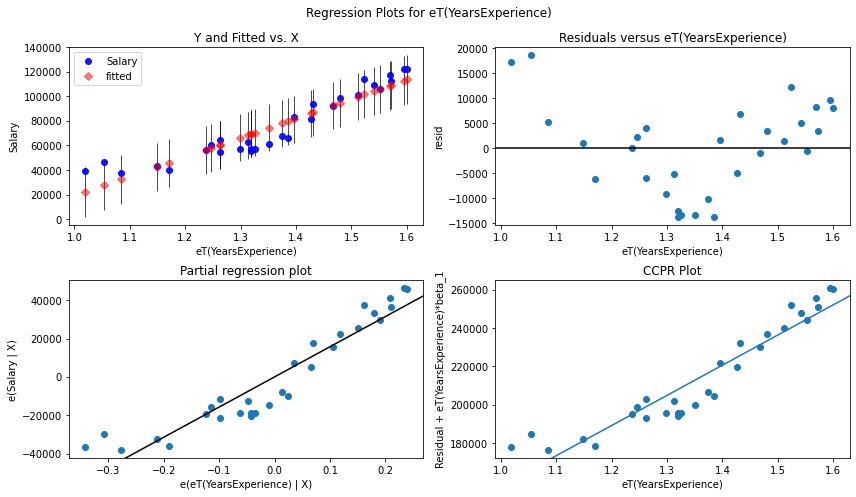

In [75]:
# regression plot for model5
fig = plt.figure(figsize =(12,7))
fig = sm.graphics.plot_regress_exog(model5, 'eT(YearsExperience)', fig = fig)

## Model summary and selection

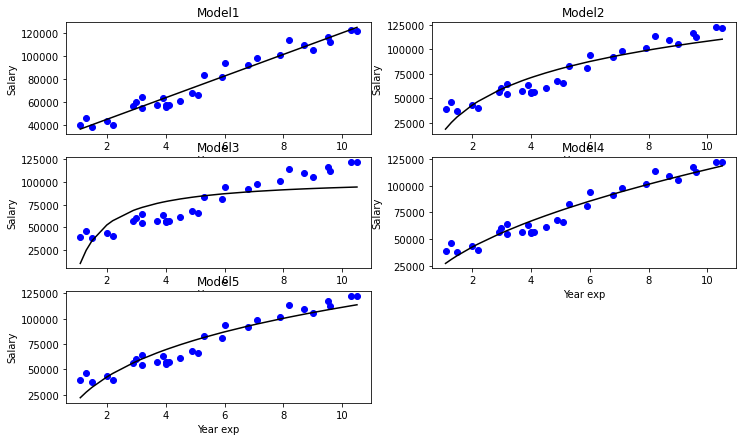

In [76]:
# Regression line is drawn using predicted values for different models
plt.figure(figsize=(12,7))

plt.subplot(3, 2, 1)
plt.scatter(x = salaryData.YearsExperience, y = salaryData.Salary, color='blue')
plt.plot(salaryData.YearsExperience, predict1, color='black')
plt.xlabel("Year exp")
plt.ylabel("Salary")
plt.title('Model1')

plt.subplot(3, 2, 2)
plt.scatter(x = salaryData.YearsExperience, y = salaryData.Salary, color='blue')
plt.plot(salaryData.YearsExperience, predict2, color='black')
plt.xlabel("Year exp")
plt.ylabel("Salary")
plt.title('Model2')

plt.subplot(3, 2, 3)
plt.scatter(x = salaryData.YearsExperience, y = salaryData.Salary, color='blue')
plt.plot(salaryData.YearsExperience, predict3, color='black')
plt.xlabel("Year exp")
plt.ylabel("Salary")
plt.title('Model3')

plt.subplot(3, 2, 4)
plt.scatter(x = salaryData.YearsExperience, y = salaryData.Salary, color='blue')
plt.plot(salaryData.YearsExperience, predict4, color='black')
plt.xlabel("Year exp")
plt.ylabel("Salary")
plt.title('Model4')

plt.subplot(3, 2, 5)
plt.scatter(x = salaryData.YearsExperience, y = salaryData.Salary, color='blue')
plt.plot(salaryData.YearsExperience, predict5, color='black')
plt.xlabel("Year exp")
plt.ylabel("Salary")
plt.title('Model5')

plt.show()

      [Models]   |    [R^2]    |  p-value  |    [RMSE]   |   [Transformation type]
    ----------------------------------------------------------------------------------
    1) model1     0.957         0.000       5592.04       without transformation
    2) model2     0.854         0.007       10302.89      logarithamic transformation
    3) model3     0.589         0.000       17288.30      reciprocal transformation
    4) model4     0.931         0.003       7080.09       squreroot transformation
    5) model5     0.891         0.000       8090.77       exponential transformation

###### Best fit model is 'model1' with accuracy of 95.70% and error measures of 5592.04
* model accuracy: 95.70%
* error prediction: 5592.04

###### Predicted salary (based on model1)
* 36187.158752
* 38077.151217
* 39967.143681
* 44692.124842
* 46582.117306